In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math


def expo(p):
    return (-1/p)*math.log(random.random())


def simulate(lamda, mu, tempsMax,prob1):


    inter_arrival = expo(lamda)
    ct = inter_arrival

    t_arrival = ct
    depart_t = 0

    #examples = {
    #    0:[],
    #    1:[]
    #}

    waiting = {
        0:[],
        1:[]
    }

    nb = {
        0:{},
        1:{}
    }

    while ct < tempsMax:

        prob = inter_arrival / tempsMax

        if prob != prob1:
            i = 0
        else:
            i = 1

        nb[i][inter_arrival] = inter_arrival/tempsMax
        #print(ct)

        service_time = expo(mu)
        nb[i][service_time] = service_time/tempsMax

        depart_t = ct + service_time
        #examples[i].append((t_arrival,depart_t))
        waiting[i].append(depart_t-t_arrival)

        inter_arrival =  expo(lamda)
        t_arrival = ct + inter_arrival

        if t_arrival < depart_t:
            ct = depart_t
        else:
            ct = t_arrival

    avg_wait = {}
    avg_customers = {}

    avg_customers[0] = sum(s * nb[0][s] for s in nb[0])
    avg_customers[1] = sum(s * nb[1][s] for s in nb[1])

    avg_wait[0] = sum(waiting[0])/len(waiting[0])

    if len(waiting[1]) !=0:
        avg_wait[1] = sum(waiting[1]) / len(waiting[1])
    else:
        avg_wait[1]=0
    return avg_wait,avg_customers



print(simulate(6,5,10,2/3))







({0: 0.21626915540580094, 1: 0}, {0: 0.3881902262050538, 1: 0})


In [50]:
p = np.zeros(30)
w = np.zeros(30)

In [51]:
for i in range(30):
    p[i] = random.random()
p.sort()

for i in range(30):
    w[i] = simulate(6,5,3,p[i])[0][0]
p,w

(array([0.0346375 , 0.04533151, 0.07257134, 0.10455397, 0.14374005,
        0.17484609, 0.19001561, 0.21402269, 0.33361368, 0.34569379,
        0.35805666, 0.39364663, 0.40152252, 0.43516785, 0.436679  ,
        0.46961513, 0.53660241, 0.61150565, 0.63462852, 0.65894764,
        0.69397993, 0.70232511, 0.70915826, 0.72630891, 0.84488023,
        0.88463051, 0.88766666, 0.96078753, 0.98893197, 0.99704377]),
 array([0.68105923, 0.23051145, 0.36192793, 0.36724239, 0.24833297,
        0.26560262, 0.14363235, 0.32353921, 0.36038079, 0.32639591,
        0.15793246, 0.26187382, 0.38679716, 0.37101416, 0.22523665,
        0.26179233, 0.25036212, 0.21568746, 0.37215365, 0.10243835,
        0.29926972, 0.49467887, 0.19165219, 0.23108842, 0.1736633 ,
        0.25466505, 0.25617358, 0.2627509 , 0.18699901, 0.48690352]))

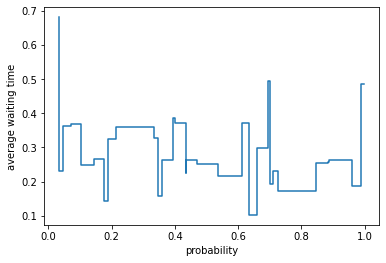

In [52]:

plt.step(p,w)
plt.xlabel('probability')
plt.ylabel('average waiting time')
plt.show()
